<a href="https://colab.research.google.com/github/AlbertoBassanoni/MLPNS_ABassanoni/blob/main/Central_Limit_Theorem_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESERCIZIO CENTRAL LIMIT THEOREM POISSON:

Provo a verificare la legge dei grandi numeri per la distribuzione di Poisson. Genero 400 sample avente una size casuale tra 10 e 1000 in cui verifico che i valori medi di questi sample sono distribuiti come una funzione gaussiana, centrata nella media teorica della distribuzione di Poisson che scelgo io a priori (ad esempio assumo mean=5).

In [1]:
# Garantisce la compatibilità di alcune funzioni tra Python 2 e Python 3
from __future__ import print_function, division

# importazione dei pacchetti compilati già visti in Python Bootcamp
import numpy as np
import scipy as sp
from scipy import stats

# questo è per l'extra credit
from scipy.optimize import curve_fit, minimize

# pylab serve per i plotting
import pylab as pl
%pylab inline
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
#setto il seed per avere gli stessi risultati nella generazione di numeri random
np.random.seed(456)

#settiamo una media che voglio io
mymean=5

Text(0.5, 0, 'x')

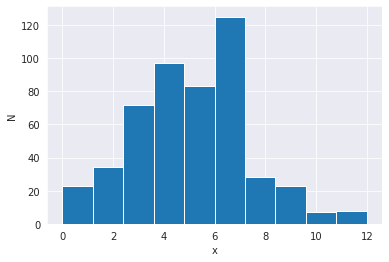

In [7]:
#per la chi square distribution il degree of freedom si ricava dalla media essendo:
#mean_chi2= k (vedi Wikipedia)
mu = mymean 

#per una binomial ad esempio:
#mean_binomial= n*p
#p = 0.5 
#n = mymean/p

#creo un dizionario

mydistribution = {}

# esempio di distribuzione

pl.hist(sp.stats.poisson.rvs(mymean, size=500));
pl.ylabel("N")
pl.xlabel("x")

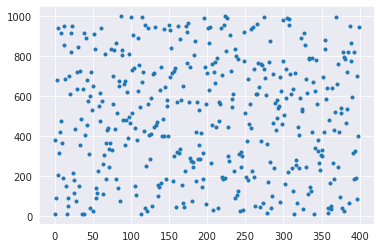

In [14]:
# genero 100 sample dalle size casuali da 10 a 1000 
mysize = (np.random.rand(400) *1000).astype(int)
mysize[mysize < 10]= 10
pl.plot(mysize, '.')

Text(0, 0.5, 'sample mean')

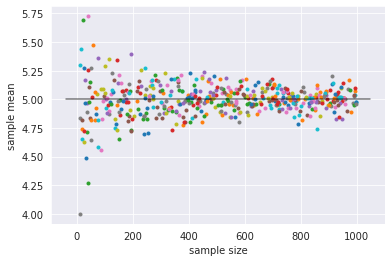

In [15]:
#mysize contiene la size della distribuzione dei miei samples

for s in mysize:
  #nel mio dizionario introduco un keyword s e un value s con gli
  #array nella distribuzione
  #nel dizionario posso mettere oggetti di diversa dimensione
  mydistribution[s] = sp.stats.poisson.rvs(mymean, size=s)

#creo la figura vuota
ax = pl.figure().add_subplot(111)

for d in mydistribution.keys():
  #plotto le 100 mean delle mie distribuzioni casuali con size casuale 
  ax.plot(d, mydistribution[d].mean(), '.')
ax.plot(pl.xlim(), [5, 5], 'k', alpha=0.5)
ax.set_xlabel("sample size")
ax.set_ylabel("sample mean")